In [1]:
from bs4 import BeautifulSoup
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:

def preprocess(q):
    q=str(q).lower().strip()

    # replace special characters with their string equivalents
    q=q.replace('%', 'percent')
    q=q.replace('$', 'dollar')
    q=q.replace('@', 'at')
    q=q.replace('र', 'rupee')
    q=q.replace('€', 'euro')
    
    # the pattern '[math]' appear around 900 times in the whole dataset 
    q=q.replace('[math]', '')

    # replacing some numbers with string quivalets
    q=q.replace(',000,000,000', 'b')
    q=q.replace(',000,000', 'm')
    q=q.replace(',000', 'k')
    q=re.sub(r'([0-9]+)000000000', r'\1b',q)
    q=re.sub(r'([0-9]+)000000', r'\1m',q)
    q=re.sub(r'([0-9]+)000', r'\1k',q)

    
    #Decontracting words 
    # Source - https://stackoverflow.com/a
    # Posted by arturomp, modified by community. See post 'Timeline' for change history
    # Retrieved 2026-01-28, License - CC BY-SA 3.0

    contractions = { 
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "i'd": "I had / I would",
    "i'd've": "I would have",
    "i'll": "I shall / I will",
    "i'll've": "I shall have / I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    q_decontracted=[]
    for word in q.split():
        if word in contractions:
            word=contractions[word]
        q_decontracted.append(word)
        
    q=' '.join(q_decontracted)
    q=q.replace("'ve", "have")
    q=q.replace("n't", "not")
    q=q.replace("'re", "are")
    q=q.replace("'ll", "will")

    # removing html tags
    q=BeautifulSoup(q, "html.parser")
    q=q.get_text()    
    
    # Remove punctuations
    pattern=re.compile(r'\W')
    q=re.sub(pattern,' ',q).strip()
    return q
    

In [3]:
preprocess("I've already! wasn't <b>jd")

'I have already  was not jd'

In [4]:
df=pd.read_csv('train.csv')
new_df=df.sample(40000, random_state=42)

In [5]:
new_df['question1']= new_df['question1'].apply(preprocess)
new_df['question2']= new_df['question2'].apply(preprocess)

In [6]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1


In [7]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [8]:
new_df['q1_num_of_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_of_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7


In [9]:
# Calculating the number of words

new_df['q1_num_of_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_of_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7


In [10]:
# Calculating the common words

def common_words(row):
    w1=set(map(lambda word: word.lower().strip() , row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip() , row['question2'].split(" ")))
    return len(w1 & w2)

new_df['word_common'] = new_df.apply(common_words ,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,word_common
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,6
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,2
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,6
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4


In [11]:
# Calculating Total words

def total_words(row):
    w1=set(map(lambda word: word.lower().strip() , row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip() , row['question2'].split(" ")))
    return (len(w1) + len(w2))

new_df['word_total'] = new_df.apply(total_words ,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,word_common,word_total
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,6,20
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,2,25
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,6,16
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4,16


In [12]:
#  Calculating the sharing words

new_df['words_share']=round(new_df['word_common']/new_df['word_total'],3)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,word_common,word_total,words_share
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16,0.438
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,6,20,0.300
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,2,25,0.080
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,6,16,0.375
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4,16,0.250


    ADVANCED FEATURE ENGINEERING

In [13]:
# Token Features

from nltk.corpus import stopwords

def fetch_token_features(row):
    q1= row['question1']
    q2= row['question2']
    
    safe_div=0.0001
    
    stop_words=stopwords.words("english")
    
    token_features=[0.0]*8
    
    # converting the sentence into tokens:
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in questions
    q1_words=set([word for word in q1_tokens if word not in stop_words])
    q2_words=set([word for word in q2_tokens if word not in stop_words])

    # get the stopwords in questions
    q1_stops=set([word for word in q1_tokens if word in stop_words])
    q2_stops=set([word for word in q2_tokens if word in stop_words])

    # get the common non-stopwords from question pair
    common_word_count=len(q1_words.intersection(q2_words))
    
    # get the common stopwords from question pair
    common_stop_count=len(q1_stops.intersection(q2_stops))

    # get the common tokens from question pair
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0]= common_word_count / (min(len(q1_words), len(q2_words)) + safe_div)
    token_features[1]= common_word_count / (max(len(q1_words), len(q2_words)) + safe_div)
    token_features[2]= common_stop_count / (min(len(q1_stops), len(q2_stops)) + safe_div)
    token_features[3]= common_stop_count / (max(len(q1_stops), len(q2_stops)) + safe_div)
    token_features[4]= common_token_count / (min(len(q1_tokens), len(q2_tokens)) + safe_div)
    token_features[5]= common_token_count / (max(len(q1_tokens), len(q2_tokens)) + safe_div)

    # Last word of both questions is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both questions is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    return token_features
    

In [14]:
token_features= new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"] = list(map(lambda x: x[0], token_features))
new_df["cwc_max"] = list(map(lambda x: x[1], token_features))
new_df["csc_min"] = list(map(lambda x: x[2], token_features))
new_df["csc_max"] = list(map(lambda x: x[3], token_features))
new_df["ctc_min"] = list(map(lambda x: x[4], token_features))
new_df["ctc_max"] = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"] = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,...,word_total,words_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,16,0.438,0.749981,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,...,20,0.300,0.399992,0.399992,0.999975,0.666656,0.666659,0.545450,0.0,1.0
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,...,25,0.080,0.000000,0.000000,0.499988,0.249997,0.249997,0.124999,0.0,0.0
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,...,16,0.375,0.999975,0.999975,0.666644,0.399992,0.857131,0.666659,0.0,1.0
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,16,0.250,0.749981,0.599988,0.333322,0.249994,0.571420,0.444440,0.0,1.0


In [16]:
# Length features

import distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    length_features=[0.0]*6
    
    # converting the sentence into Tokens:
    q1_tokens=q1.split()
    q2_tokens=q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # average token length of both questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1,q2))

    if len(strs) > 0:
        length_features[2] = len(strs[0]) / (min (len(q1), len(q2))+1)
    else:
        length_features[2] = 0.0

    # Mean Word Length (Average character length per word across both questions)
    q1_mean = sum(len(word) for word in q1) / (len(q1) + 0.0001)
    q2_mean = sum(len(word) for word in q2) / (len(q2) + 0.0001)
    length_features[3] = (q1_mean + q2_mean) / 2

    return length_features
    

In [17]:
length_features = new_df.apply( fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x:x[1],length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))
new_df['mean_word_length']= list(map(lambda x: x[3], length_features))

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,mean_word_length
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.999975,0.999975,0.874989,0.874989,0.0,1.0,0.0,8.0,0.823529,0.999997
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,...,0.999975,0.666656,0.666659,0.545450,0.0,1.0,2.0,10.0,0.333333,0.999998
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,...,0.499988,0.249997,0.249997,0.124999,0.0,0.0,8.0,12.0,0.111111,0.999998
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,...,0.666644,0.399992,0.857131,0.666659,0.0,1.0,2.0,8.0,0.272727,0.999998
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,0.333322,0.249994,0.571420,0.444440,0.0,1.0,2.0,8.0,0.344828,0.999997


In [19]:
# fuzzy features

from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']
    fuzzy_features=[0.0]*4

    # fuzzy ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzzy partial ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

    # token sort ratio
    fuzzy_features[2]= fuzz.token_sort_ratio(q1,q2)

    # token set ratio
    fuzzy_features[3] =fuzz.token_set_ratio(q1,q2)
    return fuzzy_features

In [20]:
fuzzy_features = new_df.apply(fetch_fuzzy_features , axis=1)

new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_particular_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['fuzz_token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['fuzz_token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,mean_word_length,fuzz_ratio,fuzz_particular_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.0,1.0,0.0,8.0,0.823529,0.999997,88,88,81,90
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,...,0.0,1.0,2.0,10.0,0.333333,0.999998,73,72,73,73
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,...,0.0,0.0,8.0,12.0,0.111111,0.999998,35,43,36,24
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,...,0.0,1.0,2.0,8.0,0.272727,0.999998,72,67,89,96
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,0.0,1.0,2.0,8.0,0.344828,0.999997,68,61,71,81


In [22]:
print(new_df.columns.tolist())


['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'q1_len', 'q2_len', 'q1_num_of_words', 'q2_num_of_words', 'word_common', 'word_total', 'words_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substr_ratio', 'mean_word_length', 'fuzz_ratio', 'fuzz_particular_ratio', 'fuzz_token_sort_ratio', 'fuzz_token_set_ratio']


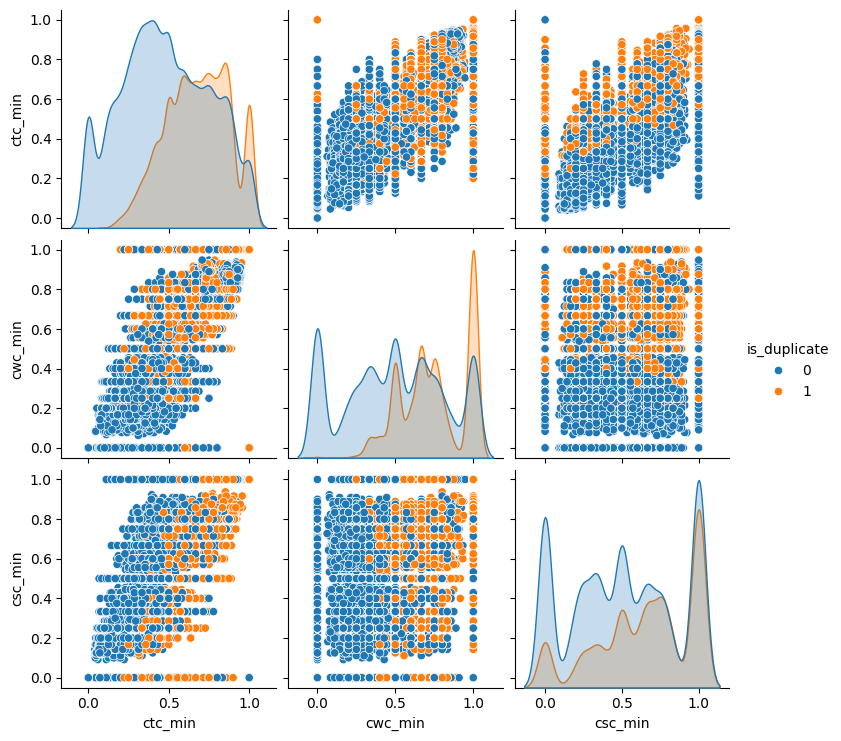

In [23]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min','is_duplicate']] , hue= 'is_duplicate')

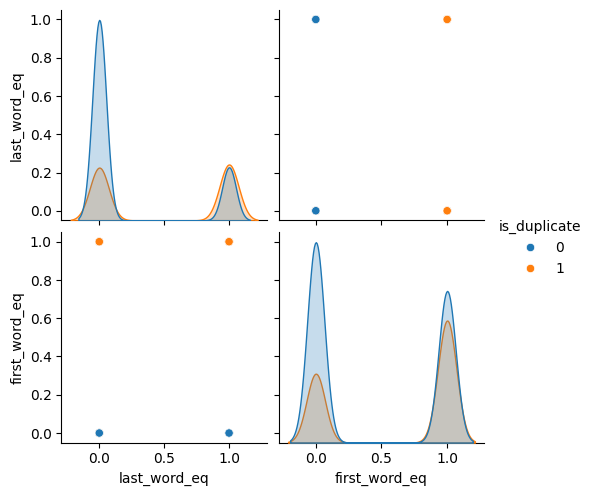

In [24]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq','is_duplicate']] , hue= 'is_duplicate')

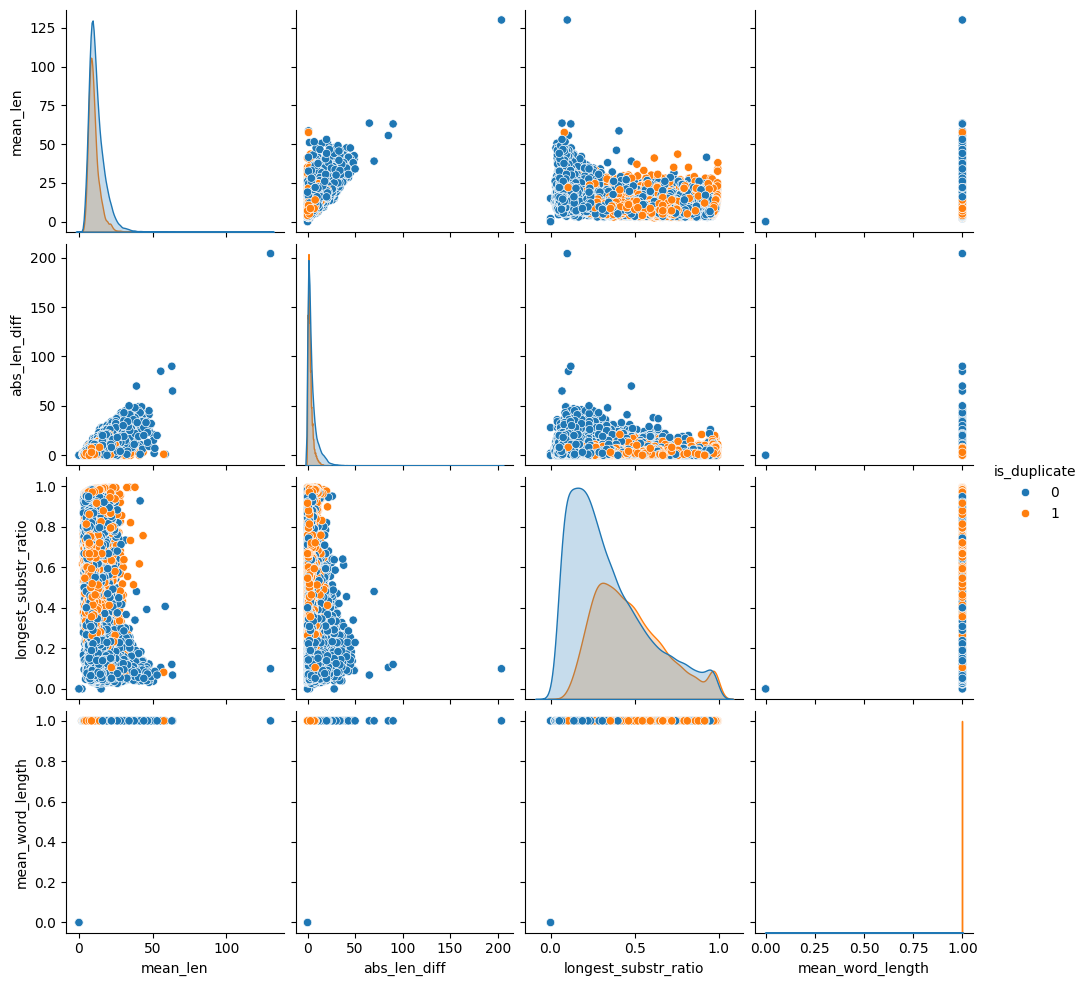

In [25]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff', 'longest_substr_ratio','mean_word_length','is_duplicate']] , hue= 'is_duplicate')

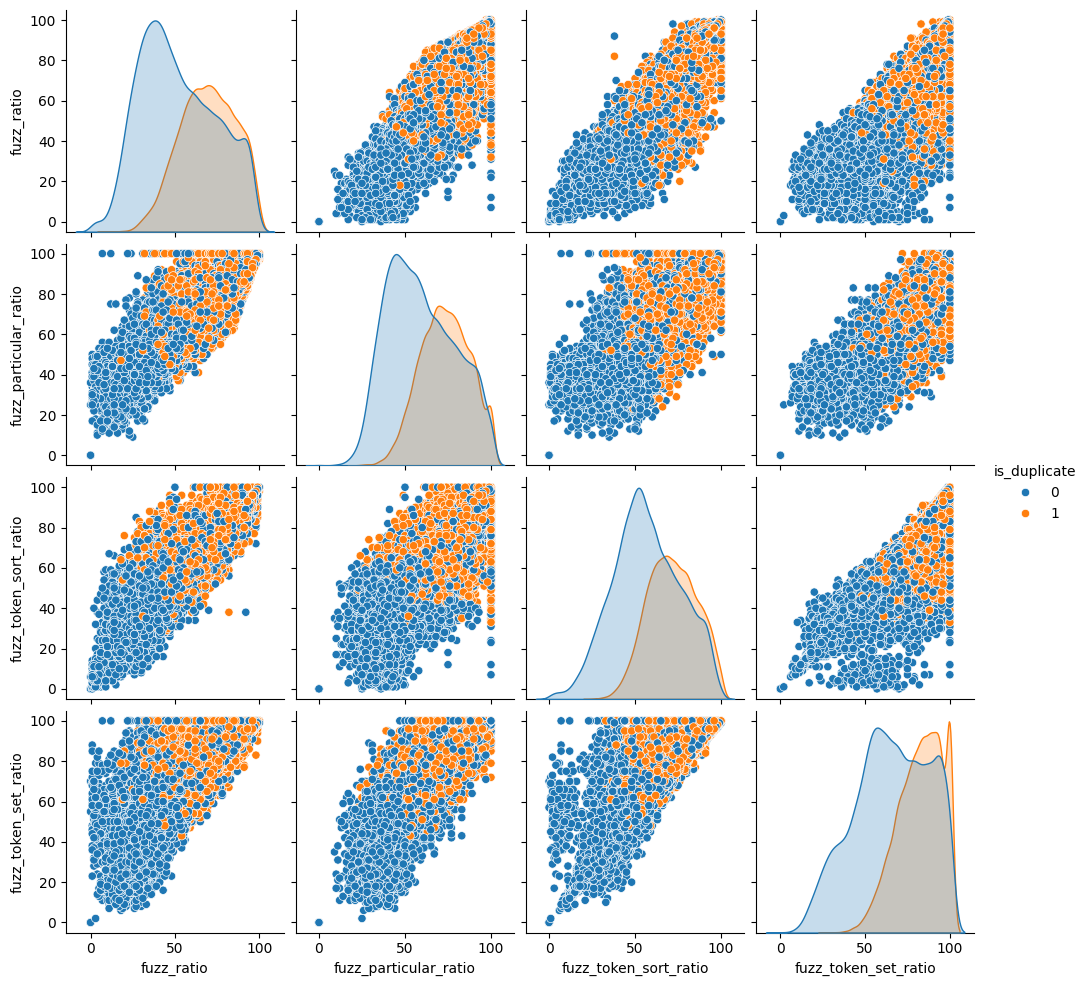

In [26]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_particular_ratio', 'fuzz_token_sort_ratio','fuzz_token_set_ratio','is_duplicate']] , hue= 'is_duplicate')

In [27]:
from sklearn.preprocessing import MinMaxScaler

x=MinMaxScaler().fit_transform(new_df[['cwc_min','cwc_max','ctc_min','ctc_max','csc_min','csc_max','last_word_eq','first_word_eq','mean_len', 'abs_len_diff', 'longest_substr_ratio', 'mean_word_length','fuzz_ratio', 'fuzz_particular_ratio', 'fuzz_token_sort_ratio','fuzz_token_set_ratio']])
y=new_df['is_duplicate'].values


In [28]:
# using TSNE for Dimensionality Reduction for the 15 features

from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='pca', #pca
    n_jobs=-1,
    random_state=101,
    method= 'barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.005s...
[t-SNE] Computed neighbors for 40000 samples in 9.042s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sam

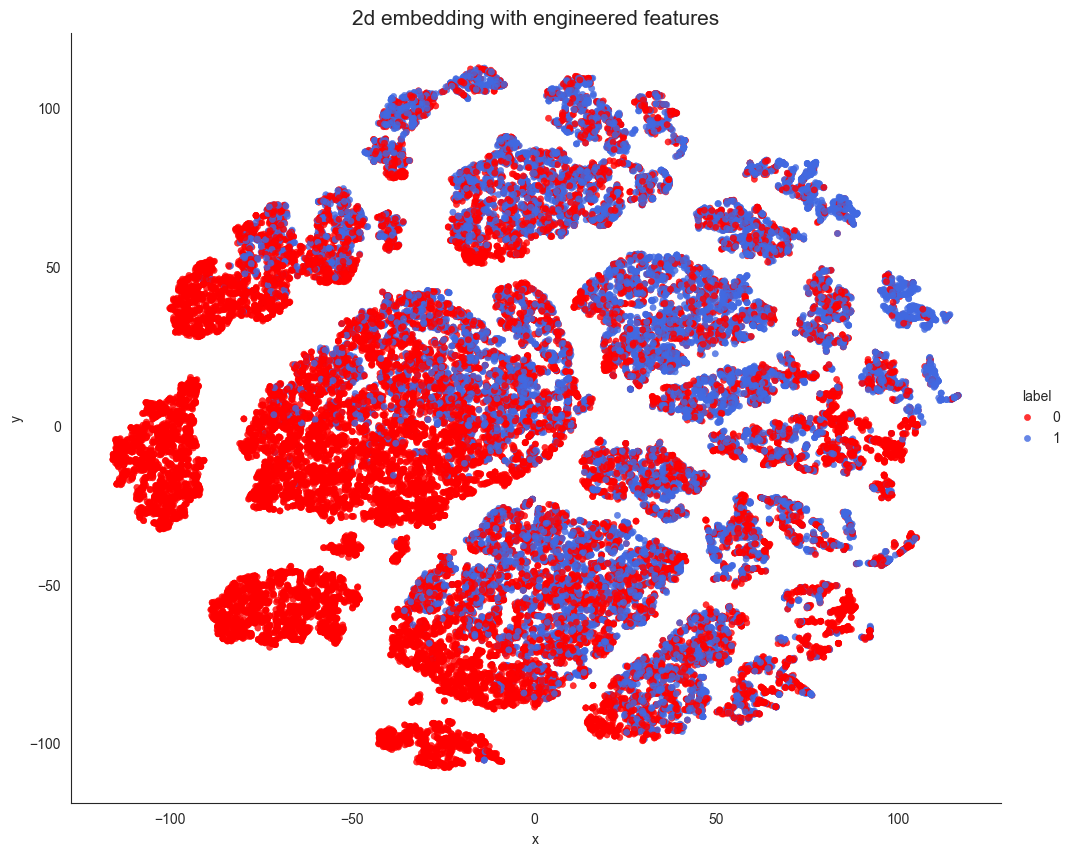

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Set the aesthetic style to white background (to match your screenshot)
sns.set_style("white")

# 2. Define the plot size
plt.figure(figsize=(12, 10))

# 3. Create the scatter plot using Seaborn
# We use 's' for marker size and 'alpha' for transparency to handle the overlap
scatter = sns.scatterplot(
    x=tsne2d[:, 0], 
    y=tsne2d[:, 1], 
    hue=y, 
    palette={0: 'red', 1: 'royalblue'}, # Custom colors to match the Portland/Red-Blue look
    alpha=0.8,
    s=20,          # Adjust size to match the density in your image
    edgecolor=None # Removes the white outlines for a smoother look
)

# 4. Final touches to match the UI in your screenshot
plt.title('2d embedding with engineered features', fontsize=15)
plt.xlabel('x')
plt.ylabel('y')

# Place the legend outside to the right
plt.legend(title='label', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Remove the top and right spines for a clean look
sns.despine()

plt.show()

In [30]:
from sklearn.manifold import TSNE

# Re-run TSNE with 3 components
tsne3d = TSNE(
    n_components=3,
    init='random', 
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5,
    n_jobs=-1
).fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.006s...
[t-SNE] Computed neighbors for 40000 samples in 9.482s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sam

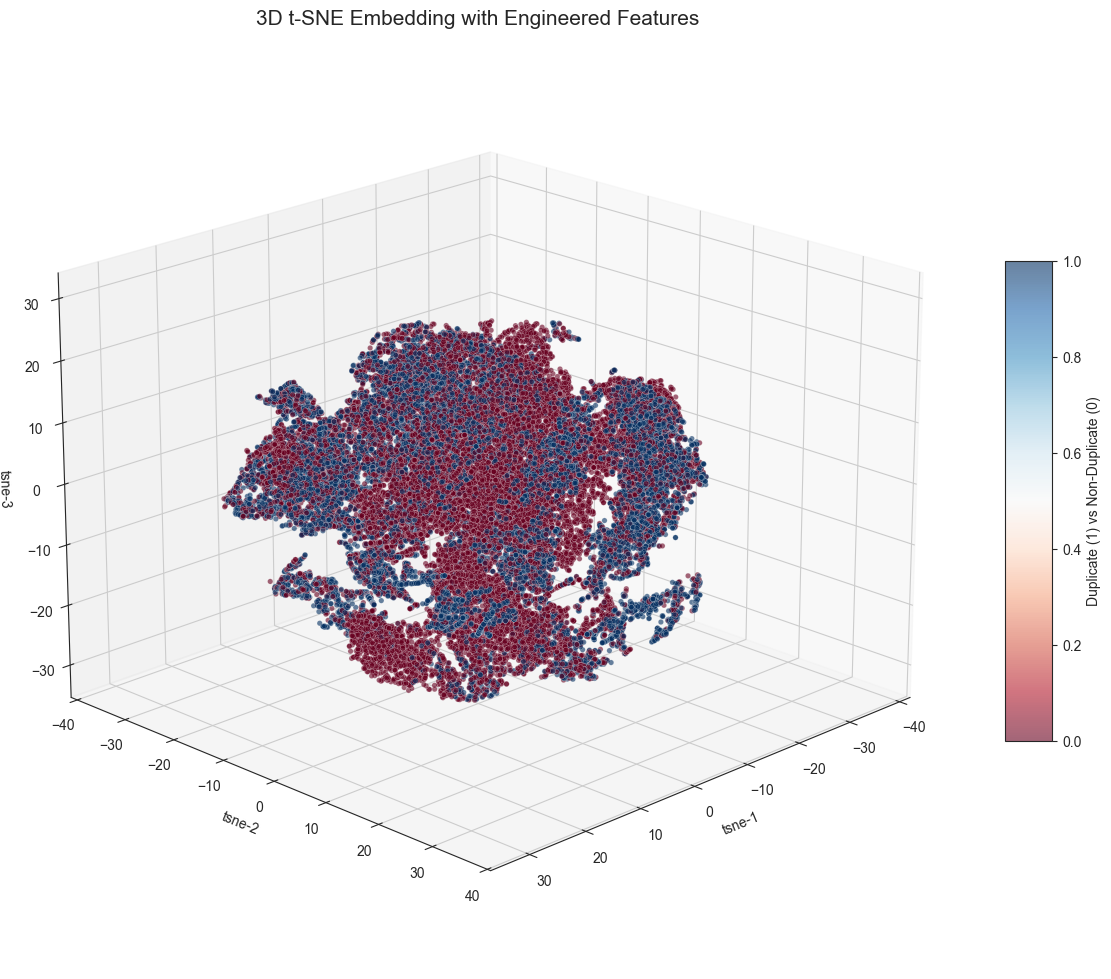

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Setup the figure and 3D axis
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 2. Create the scatter plot
# c=y sets the color based on your labels
# cmap='RdBu' or 'coolwarm' closely mimics the Red/Blue Portland theme
scatter = ax.scatter(
    tsne3d[:, 0], 
    tsne3d[:, 1], 
    tsne3d[:, 2], 
    c=y, 
    cmap='RdBu', 
    s=15,          # Size of the points
    alpha=0.6,     # Transparency
    edgecolor='w', # White border around points to match your Plotly code
    linewidth=0.2
)

# 3. Add labels and title
ax.set_title('3D t-SNE Embedding with Engineered Features', fontsize=15)
ax.set_xlabel('tsne-1')
ax.set_ylabel('tsne-2')
ax.set_zlabel('tsne-3')

# 4. Add a colorbar to indicate duplicate (1) vs non-duplicate (0)
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Duplicate (1) vs Non-Duplicate (0)')

# Optional: Adjust the starting camera angle
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()s

In [39]:
question_df=new_df[['question1','question2']]
question_df.head()
print(question_df.shape)

(40000, 2)


In [36]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(40000, 24)


,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,word_common,word_total,words_share,cwc_min,cwc_max,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,mean_word_length,fuzz_ratio,fuzz_particular_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio
8067,0,33,33,8,8,7,16,0.438,0.749981,0.749981,...,0.0,1.0,0.0,8.0,0.823529,0.999997,88,88,81,90
368101,0,52,50,11,9,6,20,0.300,0.399992,0.399992,...,0.0,1.0,2.0,10.0,0.333333,0.999998,73,72,73,73
70497,0,95,44,17,8,2,25,0.080,0.000000,0.000000,...,0.0,0.0,8.0,12.0,0.111111,0.999998,35,43,36,24
226567,1,43,51,7,9,6,16,0.375,0.999975,0.999975,...,0.0,1.0,2.0,8.0,0.272727,0.999998,72,67,89,96
73186,1,37,28,9,7,4,16,0.250,0.749981,0.599988,...,0.0,1.0,2.0,8.0,0.344828,0.999997,68,61,71,81


In [40]:
# save the datasets

question_df.to_pickle("2_Questions_dataset.pkl")
final_df.to_pickle("2_Featured_dataset.pkl")

print(question_df.shape, final_df.shape)

(40000, 2) (40000, 24)
